In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones

import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
matplotlib.style.use('seaborn-talk')
matplotlib.style.use('fivethirtyeight');

import os

In [2]:
import geopandas as gpd

In [3]:
rio = gpd.read_file('Rio Rancho Police Department.geojson')

In [4]:
rio.shape

(451402, 20)

https://towardsdatascience.com/how-to-make-a-gif-map-using-python-geopandas-and-matplotlib-cd8827cefbc8

In [5]:
rio.columns

Index(['city', 'latitude', 'parent_incident_type', 'zip', 'state',
       'day_of_week', 'incident_id', 'clearance_type', 'incident_description',
       'country', 'longitude', 'address_2', 'hour_of_day', 'created_at',
       'address_1', 'incident_type_primary', 'updated_at', 'case_number',
       'incident_datetime', 'geometry'],
      dtype='object')

In [6]:
rio.geometry.head()

0    POINT (-106.6963095 35.2252501)
1     POINT (-106.6877598 35.227701)
2    POINT (-106.6769924 35.2415928)
3    POINT (-106.5907039 35.3312074)
4    POINT (-106.6768927 35.2584993)
Name: geometry, dtype: object

Let's load the RR streetnetwork from OSM

In [7]:
import osmnx as ox
G = ox.graph_from_place('Rio Rancho, New Mexico', network_type='drive')

In [8]:
ox.save_graph_shapefile(G, 'openstreetmap_riorancho', folder='.')

/anaconda3/envs/geopandas/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [9]:
streets = gpd.read_file('openstreetmap_riorancho/edges/')

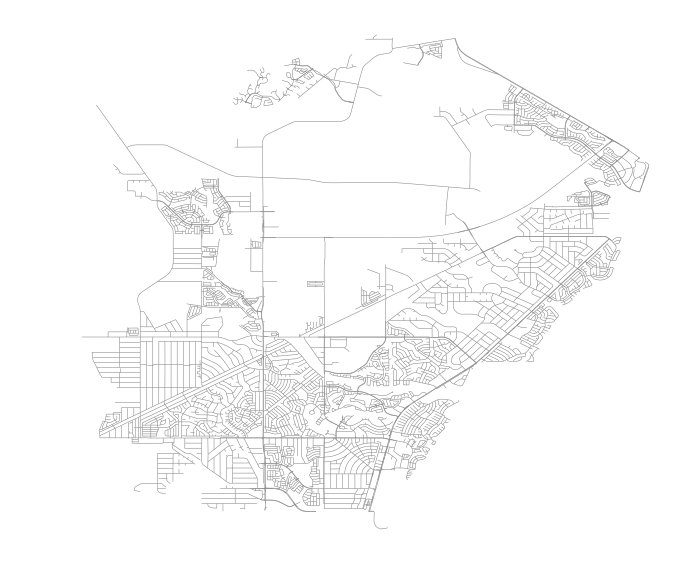

In [10]:
ax = streets.plot(linewidth=0.5, color='grey', figsize=(15,10))
#stations.plot(ax=ax, markersize=20)
ax.set_axis_off()

In [11]:
streets.crs

{'init': 'epsg:4326'}

In [12]:
rio.crs

{'init': 'epsg:4326'}

In [13]:
rio.head()

,city,latitude,parent_incident_type,zip,state,day_of_week,incident_id,clearance_type,incident_description,country,longitude,address_2,hour_of_day,created_at,address_1,incident_type_primary,updated_at,case_number,incident_datetime,geometry
0,RIO RANCHO,35.2252501,Other,87124,NM,Friday,796527208,,ACCIDENT NO INJURY,None,-106.6963095,None,12,2017-03-07T18:13:49,UNSER BLVD & WESTSIDE BLVD,ACCIDENT NO INJURY,2018-03-01T06:54:40,117001723,2017-10-20T12:13:00,POINT (-106.6963095 35.2252501)
1,RIO RANCHO,35.227701,Theft,87124,NM,Thursday,834802567,,LARCENY - OTHER,None,-106.6877598,None,13,2018-02-21T21:56:53,2300 Block CORTINA,[RMS] LARCENY - OTHER,2018-03-01T06:54:44,118000107,2017-11-30T13:15:00,POINT (-106.6877598 35.227701)
2,RIO RANCHO,35.2415928,Other,87124,NM,Saturday,799784408,,ACCIDENT NO INJURY,None,-106.6769924,None,9,2017-03-29T19:11:58,SOUTHERN BLVD & GOLF COURSE RD,ACCIDENT NO INJURY,2018-03-01T06:54:40,117002025,2017-12-09T09:35:00,POINT (-106.6769924 35.2415928)
3,RIO RANCHO,35.3312074,Theft from Vehicle,87144,NM,Wednesday,832176379,,LARCENY - MOTOR VEH. PARTS & ACC.,None,-106.5907039,None,22,2018-01-22T17:57:42,7200 Block PECHORA,[RMS] LARCENY - MOTOR VEH. PARTS & ACC.,2018-03-01T06:54:44,118000097,2017-12-20T22:07:00,POINT (-106.5907039 35.3312074)
4,RIO RANCHO,35.2584993,Community Policing,87124,NM,Thursday,833689174,,WARRANT ARREST,None,-106.6768927,None,10,2018-02-08T19:34:55,4000 Block HIGH RESORT,[RMS] WARRANT ARREST,2018-03-01T06:54:42,118000046,2017-12-28T10:40:00,POINT (-106.6768927 35.2584993)


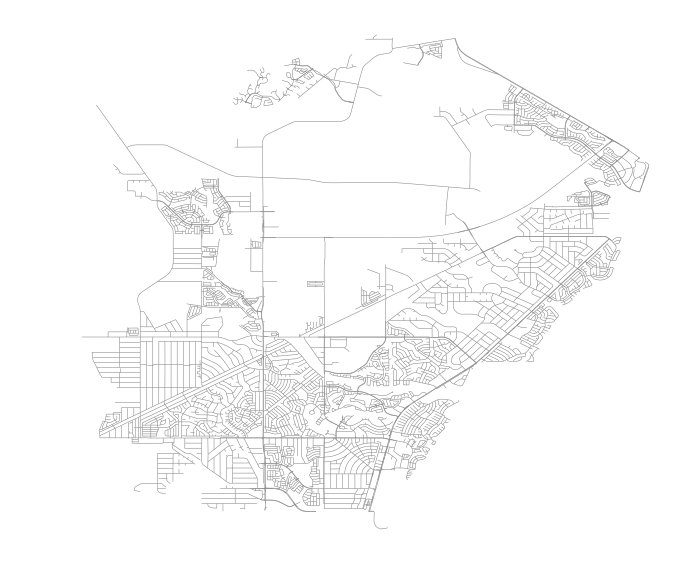

In [15]:
ax = streets.plot(linewidth=0.5, color='grey', figsize=(15,10))
#stations.plot(ax=ax, markersize=20)
#rio.head(50).plot(column='parent_incident_type',ax=ax,markersize=20,
#                 legend=True,figsize=(15,10))
ax.set_axis_off()

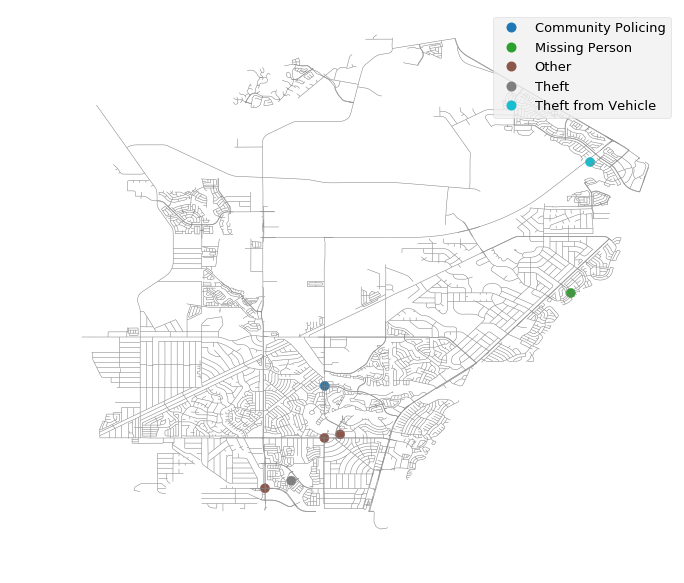

In [23]:
ax = streets.plot(linewidth=0.5, color='grey', figsize=(15,10))
#stations.plot(ax=ax, markersize=20)
rio.head(7).plot(ax=ax,column='parent_incident_type',
                 legend=True,figsize=(15,10))
ax.set_axis_off()